## Participants
* Samantha
* Rachelle
* Andrew

## Résumé des observations

Ce jeu de données comprend 6 colonnes et 13 508 117 lignes



# <div style='color:white;background: #005792;text-align: center;padding: 15px 0'>Recommandations - Visualisation de la source de données Name basics</div>

### Installation des librairies

In [2]:
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly-express
# !pip install plotly
# !pip install multiprocessing

### Importation des librairies

In [1]:
import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns

import re
from multiprocessing import Process

### Chargement des fichiers

In [2]:
source_dir= '/home/dstrec/dstrec/010_data/000_source/imdb_datasets'
name_file= 'name.basics.tsv'
file_path= f"{source_dir}/{name_file}"

df = pd.read_csv(file_path, sep='\t', na_values='\\N', low_memory=False, chunksize = 1000000)

df = pd.concat(df)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13508117 entries, 0 to 13508116
Data columns (total 6 columns):
 #   Column             Dtype  
---  ------             -----  
 0   nconst             object 
 1   primaryName        object 
 2   birthYear          float64
 3   deathYear          float64
 4   primaryProfession  object 
 5   knownForTitles     object 
dtypes: float64(2), object(4)
memory usage: 618.4+ MB


### Visualisation de la part de non renseigné de chaque variable du fichier

DataVisualisation de la variable  nconst
Cette variable a  13508117  valeurs distintes
Cette variable ne contient pas de données non renseignées 

DataVisualisation de la variable  primaryName
Cette variable a  10403926  valeurs distintes


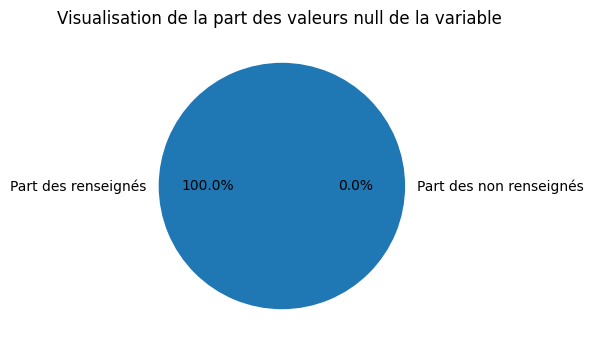

DataVisualisation de la variable  birthYear
Cette variable a  541  valeurs distintes


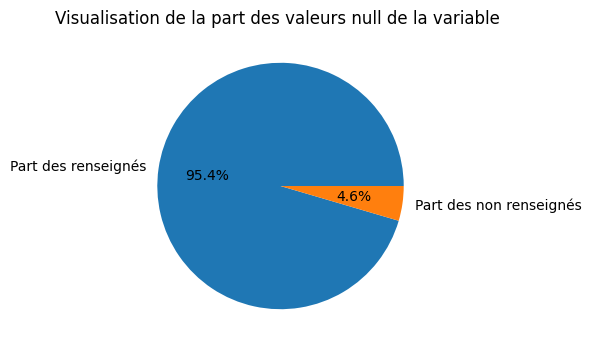

DataVisualisation de la variable  deathYear
Cette variable a  485  valeurs distintes


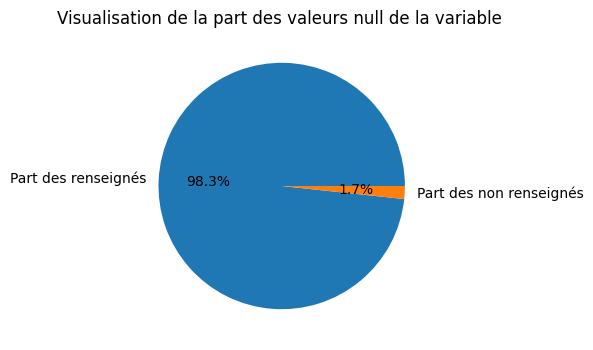

DataVisualisation de la variable  primaryProfession
Cette variable a  22875  valeurs distintes


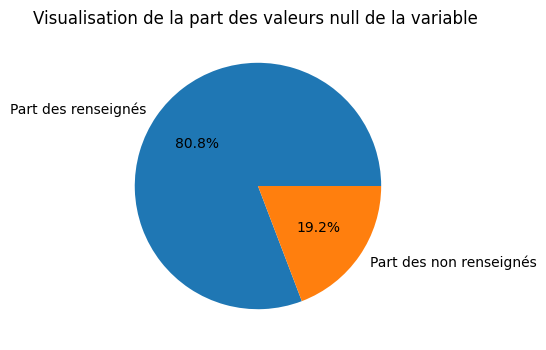

DataVisualisation de la variable  knownForTitles
Cette variable a  5646698  valeurs distintes


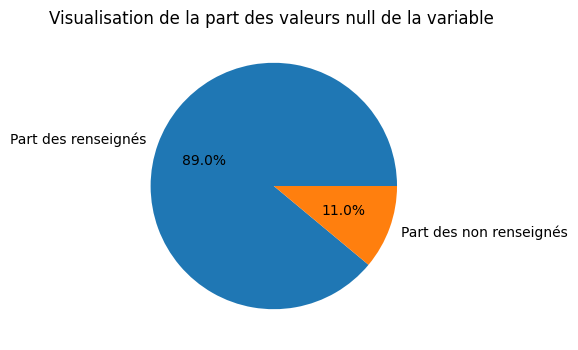

In [6]:
#Visualisation de la part de non renseigné de chaque variable du fichier
########################################################################""
for i in df.columns.values:
    print("DataVisualisation de la variable ",i)
    print("Cette variable a ",len(df[i].unique())," valeurs distintes")    
    if df[i].isna().sum()>0:
       res= df[i].isnull().value_counts(normalize = "true")
       plt.figure(figsize = (4, 4))
       plt.pie(res, labels = ['Part des renseignés', 'Part des non renseignés'], autopct='%1.1f%%')
       plt.title("Visualisation de la part des valeurs null de la variable ")
       plt.show()
    else:
        print("Cette variable ne contient pas de données non renseignées","\n")


### Autres visualisation

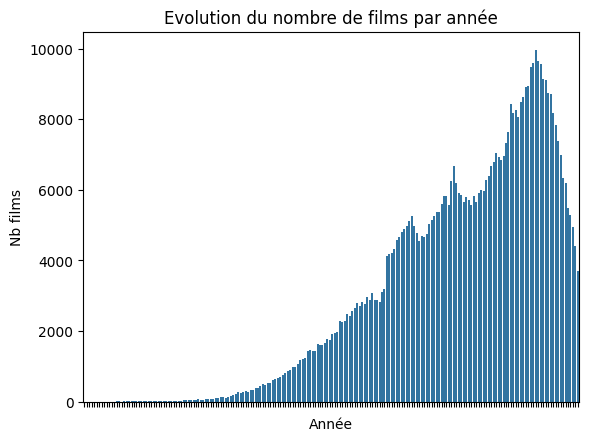

In [9]:
#Evolution du nombre de film par année
#######################################
ax = sns.barplot(y=df['birthYear'].value_counts(sort=False).head(200).values,
            x=df['birthYear'].value_counts(sort=False).head(200).index)
ax.set(xticklabels=[])
plt.title("Evolution du nombre de films par année")
plt.xlabel('Année')
plt.ylabel('Nb films')
plt.show()


Cette visualisation n'est pas exploitable car trop d'année

Il faut regrouper les données par tranches d'années

In [42]:
df['groupYear'] = df['birthYear'].apply(lambda x: "< 1950" if x < 1949 
                                              else "1950 - 1959" if x>=1950 and x<=1959
                                              else "1960 - 1969" if x>=1960 and x<=1969
                                              else "1970 - 1979" if x>=1970 and x<=1979
                                              else "1980 - 1989" if x>=1980 and x<=1989
                                              else "1990 - 1999" if x>=1990 and x<=1999
                                              else "2000 - 2009" if x>=2000 and x<=2009
                                              else "2010 - 2019" if x>=2010 and x<=2019
                                              else "2020 - 2029" if x>=2020 and x<=2029
                                              else np.nan)


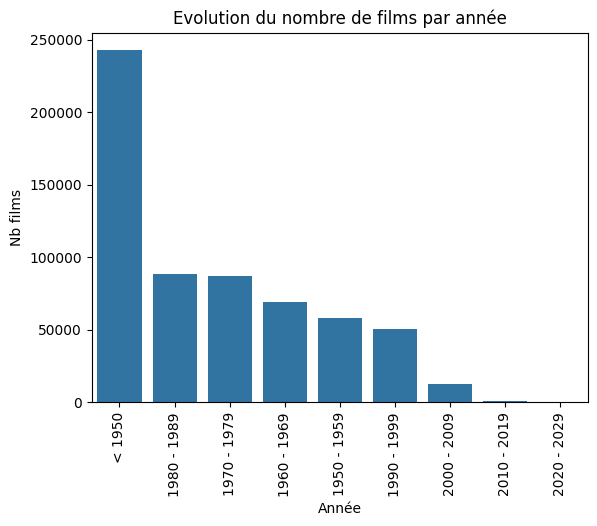

In [46]:
#Evolution du nombre de film par année
#######################################
ax = sns.barplot(y=df['groupYear'].value_counts(sort='groupYear').values,
            x=df['groupYear'].value_counts(sort='groupYear').index)
ax.tick_params(axis='x', rotation=90)
plt.title("Evolution du nombre de films par année")
plt.xlabel('Année')
plt.ylabel('Nb films')
plt.show()

Il y a beaucoup de données avant 1950, dans cette classe, ce sont tès probabement des données abérantes
Il y a peu de films après 2000

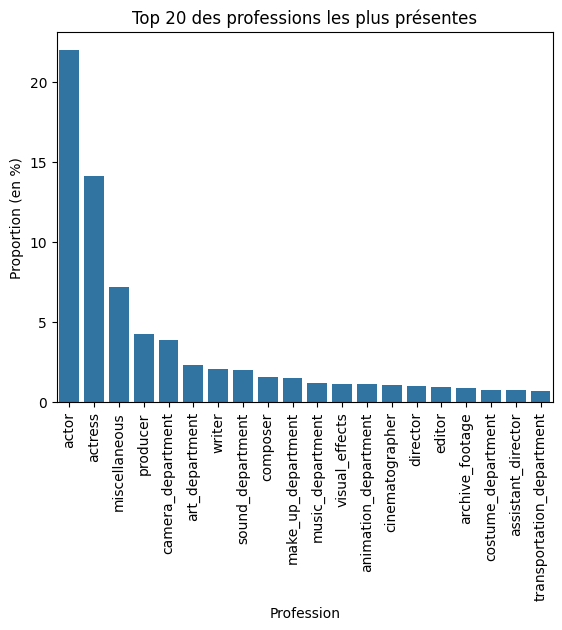

In [5]:
#Professions les plus présentes
###############################
ax = sns.barplot(y=df['primaryProfession'].value_counts(normalize=True).head(20).values*100,
            x=df['primaryProfession'].value_counts(normalize=True).head(20).index)
ax.tick_params(axis='x', rotation=90)
plt.title("Top 20 des professions les plus présentes")
plt.xlabel('Profession')
plt.ylabel('Proportion (en %)')
plt.show()

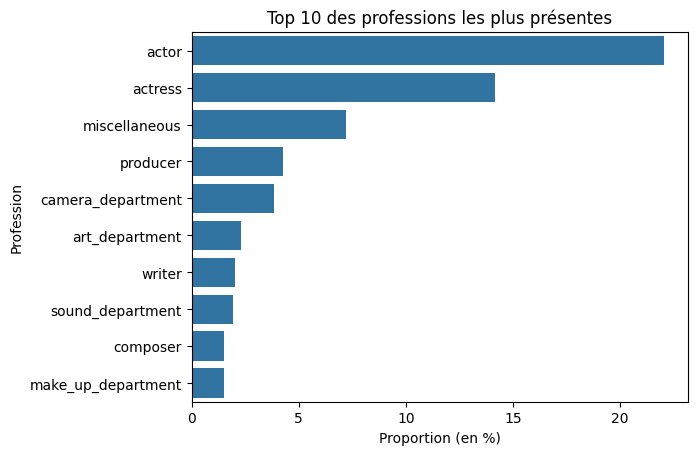

In [7]:
ax = sns.barplot(x=df['primaryProfession'].value_counts(normalize=True).head(10).values*100,
                 y=df['primaryProfession'].value_counts(normalize=True).head(10).index)
ax.tick_params(axis='y', rotation=0) 
plt.title("Top 10 des professions les plus présentes")
plt.xlabel('Proportion (en %)')
plt.ylabel('Profession')
plt.show()


Dans ce top 20, on retrouve sans surprise les acteurs, actrices, producteur etc…, qu’on s’attend à trouver. Mais c’est une donnée avec beaucoup de valeurs atomiques qu’il sera difficile de regrouper et d’exploiter